In [17]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt

from sklearn.base import BaseEstimator
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

**Comparazione tra algoritmi di clustering**

In questa esercitazione, compareremo le performance di due diversi algoritmi di clustering, ovvero il KMeans ed il DBSCAN.

Per iniziare, definiamo la procedura `fit_plot`, che mostra a schermo uno scatter plot con i risultati del clustering.

In [18]:
def fit_plot(
    cls: BaseEstimator,
    X: npt.ArrayLike,
    title: str) -> None:
    """ Wrapper per il fit ed il plot delle predizioni.

    Args:
        cls: algoritmo di clustering
        X: dati su cui effettuare il clustering
        title: titolo del plot
    """
    preds = cls.fit_predict(X)
    fig, ax = plt.subplots()
    scatter = ax.scatter(X[:, 0], X[:, 1], c=preds)
    score = silhouette_score(X, cls.labels_)
    legend = ax.legend(
        *scatter.legend_elements(),
        title='Cluster')
    ax.add_artist(legend)
    fig.suptitle(title)
    ax.grid()
    print(f'Silhouette score: {round(score, 4)}')
    plt.show()

Valutiamo cosa accade nel caso più semplice, ovvero quello in cui il nostro dataset contentente $1000$ campioni generati con la funzione [`make_blobs`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html), rispetta tutte le ipotesi alla base del K-Means.

Silhouette score: 0.8436


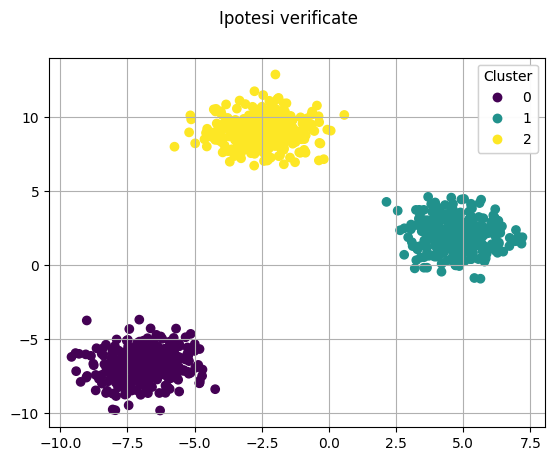

In [19]:
X, y = make_blobs(n_samples=1000, random_state=42)
kmeans = KMeans(n_clusters=3, n_init='auto')
fit_plot(kmeans, X, 'Ipotesi verificate')

Come possiamo vedere, i cluster sono ben separati, ed anche l'elevato valore del silhouette score conferma la bontà dell'operazione.

Proviamo adesso a trasformare i dati, "ruotandone" ed "allungandone" la distribuzione, in modo da rendere ciascun cluster *anisotropo*.

Silhouette score: 0.7758


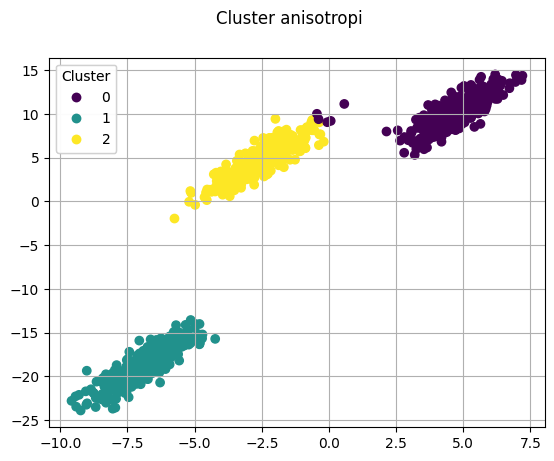

In [20]:
t = np.tan(np.radians(60))
rot = np.array([[1, t], [0, 1]])
X_an = X.dot(rot)

fit_plot(kmeans, X_an, 'Cluster anisotropi')

Notiamo che il silhouette score è leggermente diminuito, e che comunque alcuni campioni appartenenti al cluster $0$ sono erroneamente assegnati al cluster $2$.

Vediamo cosa accade adesso associando a ciascun cluster una varianza differente.

Silhouette score: 0.4883


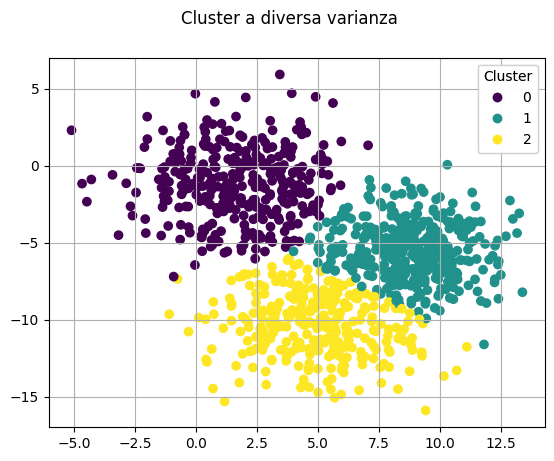

In [21]:
# Ipotesi 2: diversa varianza
X_var, y_var = make_blobs(
    n_samples=1000,
    random_state=200,
    cluster_std=[1.8, 2.5, 2.4])

fit_plot(kmeans, X_var, 'Cluster a diversa varianza')

Anche in questo caso, i risultati peggiorano: vediamo come il silhouette score sia inferiore a $0.5$ e, inoltre, i diversi cluster risultino parzialmente sovrapposti. Probabilmente, inoltre, l'ipotesi per cui sono presenti *tre* diversi cluster non è più valida in questa situazione.

Vediamo adesso cosa accade considerando dei cluster a diversa cardinalità.

Silhouette score: 0.4317


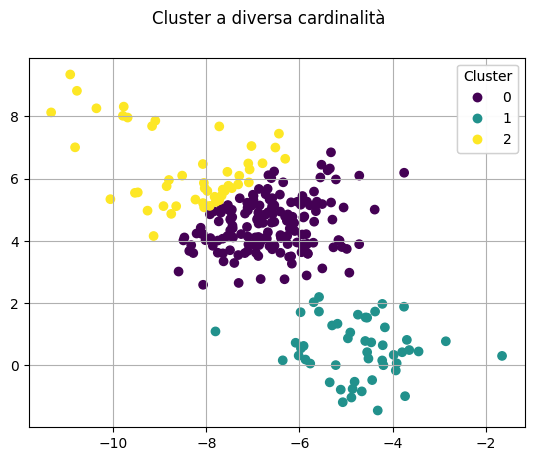

In [22]:
# Ipotesi 3: diversa cardinalità
X, y = make_blobs(n_samples=1000, random_state=12)
X_uneven = np.concatenate(
    (X[y == 0][:200], X[y == 1][:50], X[y == 2][:10]),
    axis=0)

fit_plot(kmeans, X_uneven, 'Cluster a diversa cardinalità')

Come si può vedere, l'algoritmo riesce a riconoscere "bene" i cluster $0$ ed $1$, associando però ai punti in giallo un *altro* cluster. Tuttavia, non è insensato pensare che questi punti non siano altro che outlier.

Vediamo adesso come si comporta il DBSCAN nelle medesime situazioni.

Silhouette score: 0.7367


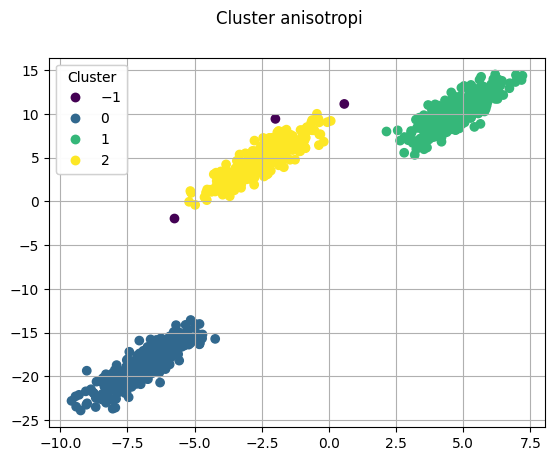

In [23]:
dbscan = DBSCAN(eps=1, min_samples=10)
fit_plot(dbscan, X_an, 'Cluster anisotropi')

Nel caso di cluster anisotropi, il DBSCAN non associa erroneamente dei campioni ad altri cluster. Inoltre, nonostante il silhouette score più basso rispetto al K-Means, l'algoritmo riesce ad individuare tre punti che, plausibilmente, possono essere considerati degli outlier rispetto al cluster $2$.

Silhouette score: 0.274


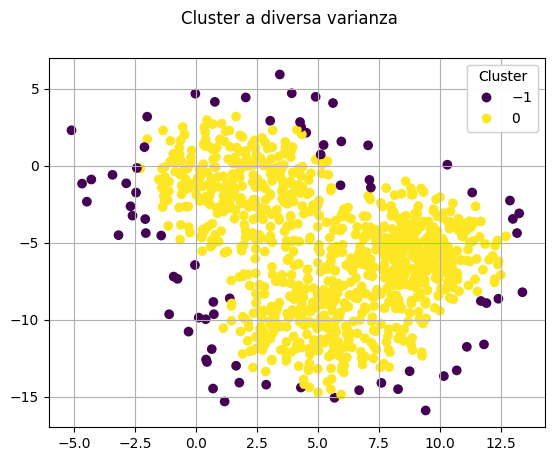

In [24]:
fit_plot(dbscan, X_var, 'Cluster a diversa varianza')

Nel caso di cluster a diversa varianza, e quindi molto sovrapposti, il DBSCAN riconosce un solo cluster di dati, con una cospicua serie di outlier evidenziati in viola. Anche in questo caso, i risultati sono abbastanza plausibili, nonostante il basso valore di silhouette score.

Silhouette score: 0.5623


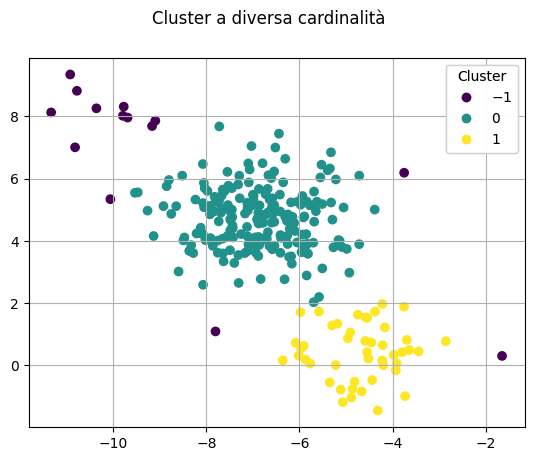

In [25]:
fit_plot(dbscan, X_uneven, 'Cluster a diversa cardinalità')

Qualora si considerino cluster a diversa cardinalità, il DBSCAN individua soltanto due diversi cluster, identificando i punti più remoti come outlier, ed ottenendo un silhouette score più alto rispetto al K-Means. Anche in questo caso, i risultati risultano essere maggiormente coerenti alla distribuzione dei dati.